In [1]:
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
from reportlab.lib.utils import ImageReader
import os
import mne
import json

from utils import *
import matplotlib
from et_qc import *
from eda_qc import *
from lsl_problem import *

In [3]:
subject = 'P5182010'
xdf_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'
video_filename = f'/Users/camilla.strauss/Desktop/CUNY_Data/Data/sub-{subject}/sub-{subject}_task-CUNY_run-001_video.avi'

In [4]:
stim_df = import_stim_data(xdf_filename)
eeg_df = import_eeg_data(xdf_filename)
ps_df = import_physio_data(xdf_filename)
cam_df = import_video_data(xdf_filename)
mic_df = import_mic_data(xdf_filename)
et_df = import_et_data(xdf_filename)


In [6]:
df = ps_df
event = 'Experiment'

In [11]:
df.loc[(df['lsl_time_stamp'] >= stim_df.loc[stim_df['event'] == 'Onset_'+event, 'lsl_time_stamp'].values[0]) & 
                  (df['lsl_time_stamp'] <= stim_df.loc[stim_df['event'] == 'Offset_'+event, 'lsl_time_stamp'].values[0])].copy().reset_index(drop = True)

,nSeq,RESPIRATION0,ECG1,EDA2,fSpO23,fSpO24,%SpO25,lsl_time_stamp,time
0,4895.0,0.06116,-0.09335,2.4239,0.55767,1.04963,91.0,652877.853918,72.863535
1,4896.0,0.06079,-0.09290,2.4242,0.55721,1.04952,91.0,652877.855585,72.865202
2,4897.0,0.06042,-0.09811,2.4231,0.55748,1.04940,91.0,652877.857252,72.866869
3,4898.0,0.06024,-0.10961,2.4246,0.55732,1.04936,91.0,652877.858919,72.868536
4,4899.0,0.05960,-0.11428,2.4239,0.55752,1.04938,91.0,652877.860586,72.870203
...,...,...,...,...,...,...,...,...,...
1547127,1552022.0,0.06500,-0.00647,12.9013,0.65739,0.00000,0.0,655456.989638,2651.999256
1547128,1552023.0,0.06482,0.00557,12.9021,0.65733,0.00000,0.0,655456.991305,2652.000923
1547129,1552024.0,0.06500,0.02462,12.9028,0.65731,0.00000,0.0,655456.992972,2652.002590
1547130,1552025.0,0.06445,0.03666,12.9028,0.65726,0.00000,0.0,655456.994639,2652.004257


In [10]:
new_df.reset_index(drop = True)

,nSeq,RESPIRATION0,ECG1,EDA2,fSpO23,fSpO24,%SpO25,lsl_time_stamp,time
0,4895.0,0.06116,-0.09335,2.4239,0.55767,1.04963,91.0,652877.853918,72.863535
1,4896.0,0.06079,-0.09290,2.4242,0.55721,1.04952,91.0,652877.855585,72.865202
2,4897.0,0.06042,-0.09811,2.4231,0.55748,1.04940,91.0,652877.857252,72.866869
3,4898.0,0.06024,-0.10961,2.4246,0.55732,1.04936,91.0,652877.858919,72.868536
4,4899.0,0.05960,-0.11428,2.4239,0.55752,1.04938,91.0,652877.860586,72.870203
...,...,...,...,...,...,...,...,...,...
1547127,1552022.0,0.06500,-0.00647,12.9013,0.65739,0.00000,0.0,655456.989638,2651.999256
1547128,1552023.0,0.06482,0.00557,12.9021,0.65733,0.00000,0.0,655456.991305,2652.000923
1547129,1552024.0,0.06500,0.02462,12.9028,0.65731,0.00000,0.0,655456.992972,2652.002590
1547130,1552025.0,0.06445,0.03666,12.9028,0.65726,0.00000,0.0,655456.994639,2652.004257


In [2]:
df_map = {
    'et': et_df,
    'ps': ps_df,
    'mic': mic_df,
    'cam': cam_df,
    'eeg': eeg_df
    }

NameError: name 'et_df' is not defined

In [7]:
# duration_vars = {"Durations of each modality + comparison to expected duration:": 
#     get_durations(xdf_path=xdf_filename, task='Experiment', df_map = df_map, stim_df = stim_df)}

    subject modality  num_losses percent_lost
0  P5182010       et           1     58.6961%
3  P5182010      cam           1      2.1742%
1  P5182010       ps           1      0.4784%
    subject modality  num_losses percent_lost
0  P5182010       et           1     58.6744%
1  P5182010       ps           1      0.5052%


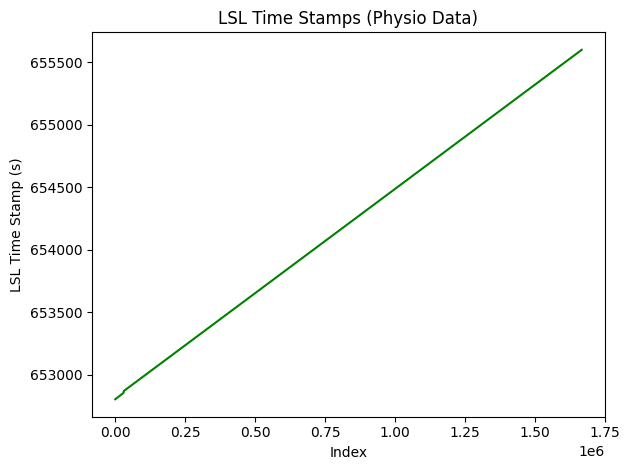

In [8]:
lsl_vars = lsl_problem_qc(xdf_filename, df_map = df_map, stim_df = stim_df)